# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [18]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    fder = (-1.5 * f(x) + 2*f(x + h) - 0.5*f(x + 2*h)) / h
    return fder

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [19]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


При h порядка 10^(-n), ошибка порядка 10^(-2n), то есть точность порядка О(h^2)

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [20]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

In [21]:
def two_point(f, x, h):
    return (f(x+h) - f(x))/h

In [22]:
err = 1000
err1 = 1
h_dec = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]:
    err1 = abs(fder(1) - deriv(f, 1, h))
    if err1 < err:
        #print(err1)
        err = err1
        h_dec = h
print('three-point one-sided rule: ℎ =', h_dec)

err = 1000
err2 = 1
h_dec_2 = 0

for h in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]:
    err2 = abs(fder(1) - two_point(f, 1, h))
    if err2 < err:
        err = err2
        h_dec_2 = h
print('two-point one-sided rule:  ℎ =', h_dec_2)


three-point one-sided rule: ℎ = 1e-05
two-point one-sided rule:  ℎ = 1e-08



### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [23]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


Видим, что точность порядка O(h), а не О(h^2). Почему так?

Предположу: когда мы используем "three-point one-sided rule", у нас остается по факту первая производная и третья производная с определенным коэффициентом. Первая производная нашей функции равна нулю (так как степенная функция быстрее, чем логарифмическая), а третья производная = 2/x -  мы не можем сказать чему она равна, так как там присутствует деление на ноль. 

Возможно, именно поэтому точность получается не О(h^2) как хотелось бы, а всего лишь О(h).

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [24]:
import numpy as np

In [25]:

def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    N = 10
    h = (b - a) / N
    x_N = np.linspace(a, b, N+1)
    I_N = h * sum([func((x_N[i] + x_N[i+1]) / 2) for i in range(N)])
    x_2N = np.linspace(a, b, 2*N+1)
    I_2N = h/2 * sum([func((x_2N[i] + x_2N[i+1]) / 2) for i in range(2*N)])
    while abs((I_2N - I_N)/I_N) > eps :
        N = 2*N
        h = h/2
        I_N = I_2N
        x_2N = np.linspace(a, b, 2*N+1)
        I_2N = h/2 * sum([func((x_2N[i] + x_2N[i+1]) / 2) for i in range(2*N)])
    return I_2N, 2*N


### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


In [26]:
I_2N, N = midpoint_rule(lambda x: x**2, 0, 2, 1e-9)
print(I_2N, N)

2.666666666269302 40960


Протестировали на нескольких функциях и эпсилонах, увидели, что чем меньше эпсилон, тем больше N.

Но кажется, что этого не достаточно, и нужно доказать зависимость как 1/N^2.

<IPython.core.display.Javascript object>


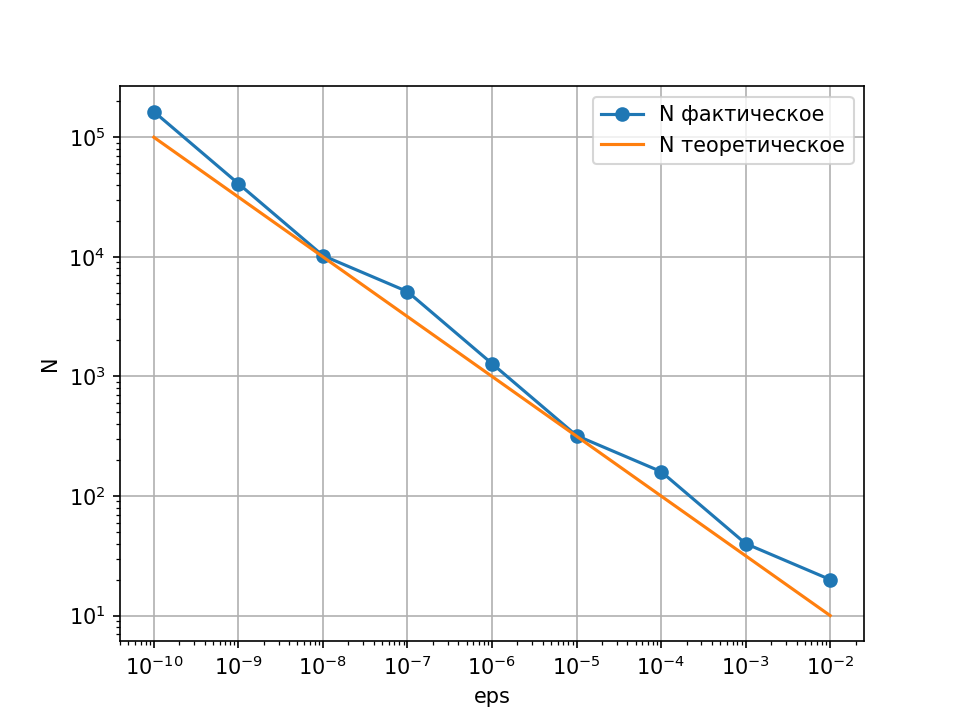

In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt
N_ar = []
i = 0
eps_ar = []
N_teor = []
for eps in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]:
    I_2N, N = midpoint_rule(lambda x: x**2, 0, 2, eps)
    N_ar.append(N)
    i = i + 1
    eps_ar.append(eps)
    N_teor.append(1 / eps**0.5)
    

plt.figure()
plt.plot(eps_ar, N_ar, 'o-', label = 'N фактическое')
plt.plot(eps_ar, N_teor, label = 'N теоретическое')
plt.legend()
plt.xlabel('eps')
plt.ylabel('N')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

По графику видно, что зависимость действительно получилась 1/N^2, как мы и предполагали.

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [28]:
I_2N, N = midpoint_rule(lambda x: np.sin(x**0.5) / x, 0, 1, 1e-4)
print('Значение интеграла =', I_2N)
print('Количество интервалов =', N)

Значение интеграла = 1.8917925357578724
Количество интервалов = 2621440


На семинаре нам показывали лайфхак, как устранять нехорошие точки в подобных интегралах (вычесть и прибавить 1/sqrt(x)).

Интеграл от 1/sqrt(x) в наших пределах будет равен 2, а то, что осталось, интегрируется хорошо.

In [29]:
I_2N, N = midpoint_rule(lambda x: np.sin(x**0.5) / x - 1 / x**0.5, 0, 1, 1e-4)
print('Значение интеграла =', I_2N + 2)
print('Количество интервалов =', N)

Значение интеграла = 1.8921612430138444
Количество интервалов = 160


Явно видно, что при использовании второго метода требуется в $\text{ }$  р а з ы   $\text{ }$меньше интервалов, чем при использовании первого.